<a href="https://colab.research.google.com/github/toskpl/DW_Matrix/blob/master/day4_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#potrzebne biblioteki
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
cd "drive/My Drive/Colab Notebooks/DW_Matrix/data"

/content/drive/My Drive/Colab Notebooks/DW_Matrix/data


In [3]:
ls

men_shoes.csv


In [4]:
#wczytanie danych z CSV
df = pd.read_csv('men_shoes.csv',low_memory=False)
df.shape

(18280, 48)

In [5]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [6]:
#srednia cena buta
mean_priece = np.mean(df['prices_amountmin'])
mean_priece

93.53952188183217

In [0]:
#wartosc prawdziwa
y_true = df['prices_amountmin']

#wartosc przewidywana (średnia cena * cały rozmair zbioru)
y_pred = y_true.shape[0] * [mean_priece]

In [8]:
#metryka sukcesu
mean_absolute_error (y_true,y_pred)

63.968341227870624

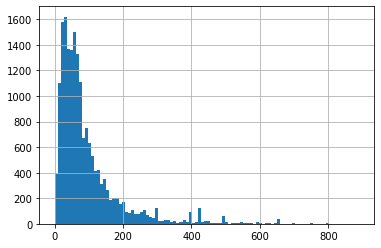

In [9]:
#histogram dlugi ogon 
df['prices_amountmin'].hist(bins= 100)

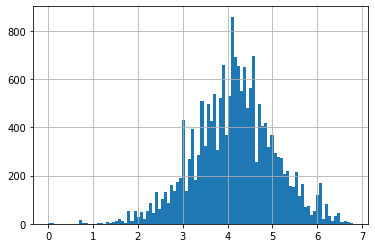

In [10]:
#log aby pozbyc sie ogona :-)
np.log1p (df['prices_amountmin']).hist(bins=100)

In [11]:
#mediana
median_priece = np.median(df['prices_amountmin'])
median_priece

#wartosc prawdziwa
y_true = df['prices_amountmin']

#wartosc przewidywana (średnia cena * cały rozmair zbioru)
y_pred = y_true.shape[0] * [median_priece]

mean_absolute_error (y_true,y_pred)

58.01120240700219

In [12]:
#logarytm
np.log1p(y_true)

#srednia z log
np.mean(np.log1p(y_true))

4.157759197235119

In [13]:
#odwrocenie log 
np.expm1(np.mean(np.log1p(y_true)))

62.92811169273113

In [14]:
#metryka sukcesu dla price_log_mean
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))

y_pred = y_true.shape[0] * [price_log_mean]

mean_absolute_error (y_true,y_pred)

58.03539547661041

In [15]:
df.brand.value_counts()

Nike               1709
PUMA                574
Ralph Lauren        524
New Balance         361
VANS                356
                   ... 
Native Eyewear        1
Sojourns End          1
PIKOLINOS             1
ChalkTalkSPORTS       1
Avia Peter            1
Name: brand, Length: 1856, dtype: int64

In [16]:
df['brand_cat'] = df['brand'].factorize()[0]
df['brand_cat']

0           0
1           0
2           1
3           1
4           1
         ... 
18275    1855
18276     307
18277     411
18278     411
18279     411
Name: brand_cat, Length: 18280, dtype: int64

In [20]:
#model DecisionTreeRegressor
feats = ['brand_cat']
X = df[feats].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score (model,X,y,scoring= 'neg_mean_absolute_error')

np.median(scores), np.std(scores)

(-57.899475222055784, 4.223555478221712)

In [0]:
#funkcja pomocnicza
def run_model (feats):
  X = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score (model,X,y,scoring= 'neg_mean_absolute_error')

  return np.median(scores), np.std(scores)

In [22]:
run_model(['brand_cat'])

(-57.899475222055784, 4.223555478221712)

In [0]:
#dodatkowe cechy
df['colors_cat'] = df['colors'].factorize()[0]

df['categories_cat'] = df['categories'].factorize()[0]

In [28]:
#wynik z nowymi cechami
run_model(['brand_cat', 'colors_cat' , 'categories_cat' ])

(-61.658852451470786, 4.907679378018417)